<a href="https://colab.research.google.com/github/jessicasilvacodes/estatistica-pucminas/blob/main/regressao_linear_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CURSO: CIÊNCIA DE DADOS APLICADA À SAÚDE | PUC MINAS
### DISCIPLINA: TÉCNICAS DE AMOSTRAGEM E MODELOS DE REGRESSÃO
### MÓDULO: REGRESSÃO LINEAR SIMPLES E MÚLTIPLA

EXERCÍCIOS:

- REGRESSÃO LINEAR SIMPLES
- REGRESSÃO LINEAR MÚLTIPLA

# REGRESSÃO LINEAR SIMPLES:

1. Análise Descritiva

2. Análise de Correlação

3. Modelo de Regressão

4. Analise de Resíduos

5. Análise do Modelo

Iremos usar um dataset com dados de propaganda e publicidade, disponibilizados pelo curso de pós-graduação em 'Ciência de Dados Aplicada à Saúde' da PUC Minas.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

### 1. Análise Descritiva

Queremos entender o quanto as propagandas e as publicidades por TV, rádio e jornal impactam as vendas.

In [39]:
dados = pd.read_csv('/content/drive/MyDrive/Data Science/PUC Minas/6. Técnicas de Amostragem e Modelos de Regressão/propaganda.csv')

Dados estatísticos:

In [40]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
dados.shape

(200, 4)

Visualização do dataset:

In [42]:
dados.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Tipo das variáveis:

In [43]:
dados.dtypes

,0
TV,float64
Radio,float64
Jornal,float64
Vendas,float64


Verificação de valores ausentes e nulos:

In [44]:
dados.isnull().sum()

,0
TV,0
Radio,0
Jornal,0
Vendas,0


O dataset não possui dados faltantes ou nulos, e todos os dados são do mesmo tipo.

Análise gráfica para verificar a disposição dos dados e relação entre as variáveis:

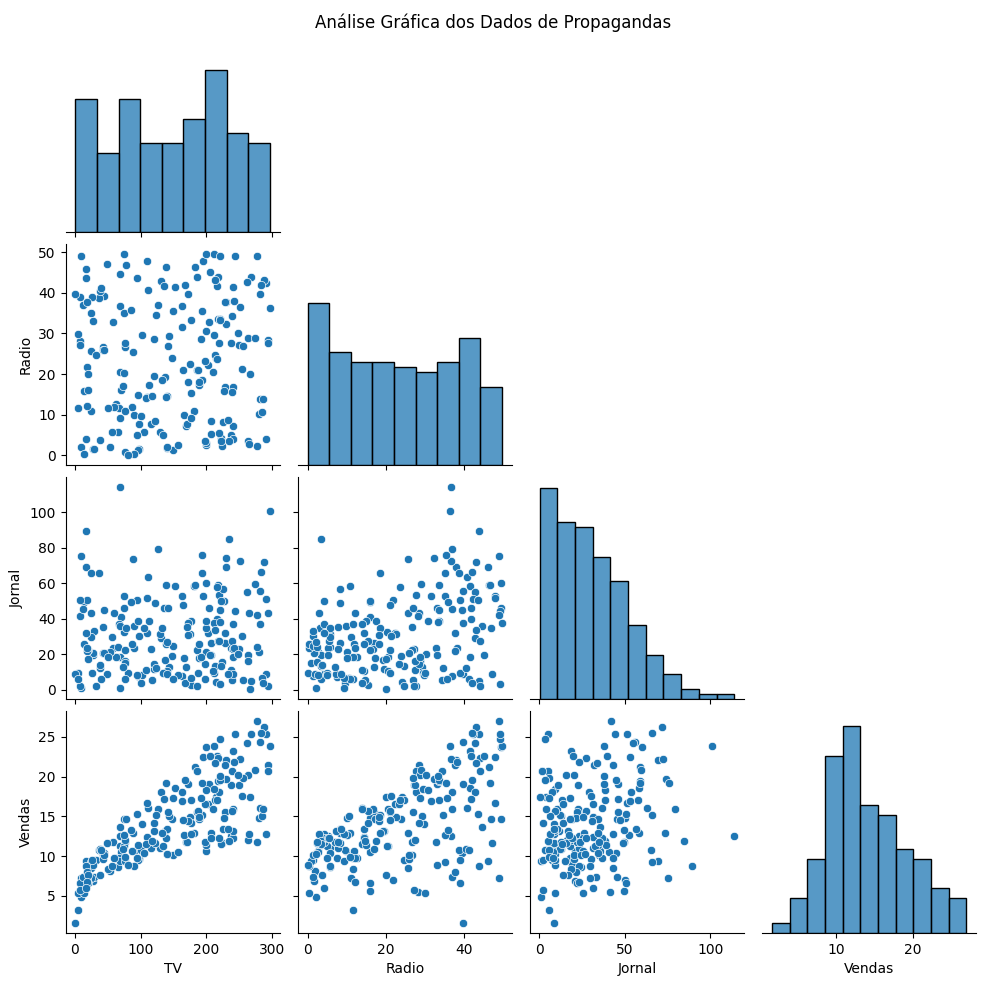

In [45]:
sns.pairplot(dados, corner=True) # corner corta metade do gráfico pois é simetrico.
plt.suptitle("Análise Gráfica dos Dados de Propagandas")
plt.show()

Vendas e TV = relação mais clara e mais precisa.

### 2. Análise de Correlação

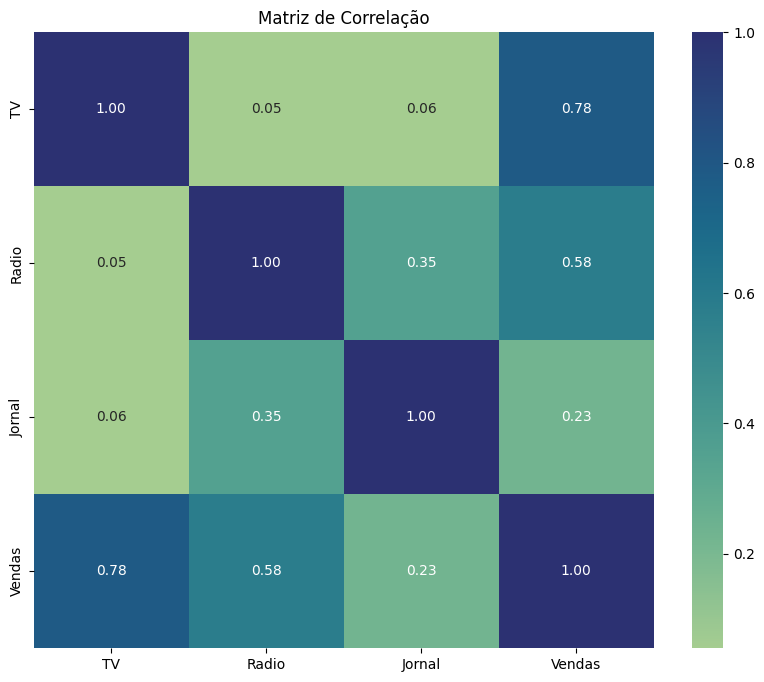

In [46]:
correlation_matrix = dados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Podemos ver claramente que a correlacão de vendas com propagandas em TV é maior que em Radio, que é maior que no Jornal.

### 3. Modelo de Regressão

In [47]:
# definindo a variável dependente (Vendas) e independente (TV)
X = dados['TV']  # variável independente (TV)
X_radio = dados['Radio']
X_jornal = dados['Jornal']
y = dados['Vendas']  # variável dependente (Vendas)

# transforma em matriz

In [48]:
# adicionando uma constante à variável independente
X = sm.add_constant(X)
X_radio = sm.add_constant(X_radio)
X_jornal = sm.add_constant(X_jornal)

In [49]:
# ajustando o modelo de regressão linear // variável resposta
modelo_tv = sm.OLS(y, X).fit()
modelo_radio = sm.OLS(y, X_radio).fit()
modelo_jornal = sm.OLS(y, X_jornal).fit()

# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto)

In [50]:
# sumário do modelo
modelo_tv_summary = modelo_tv.summary()
modelo_radio_summary = modelo_radio.summary()
modelo_jornal_summary = modelo_jornal.summary()

### 4. Análise de Resíduos

In [51]:
residuos_tv = modelo_tv.resid
residuos_radio = modelo_radio.resid
residuos_jornal = modelo_jornal.resid

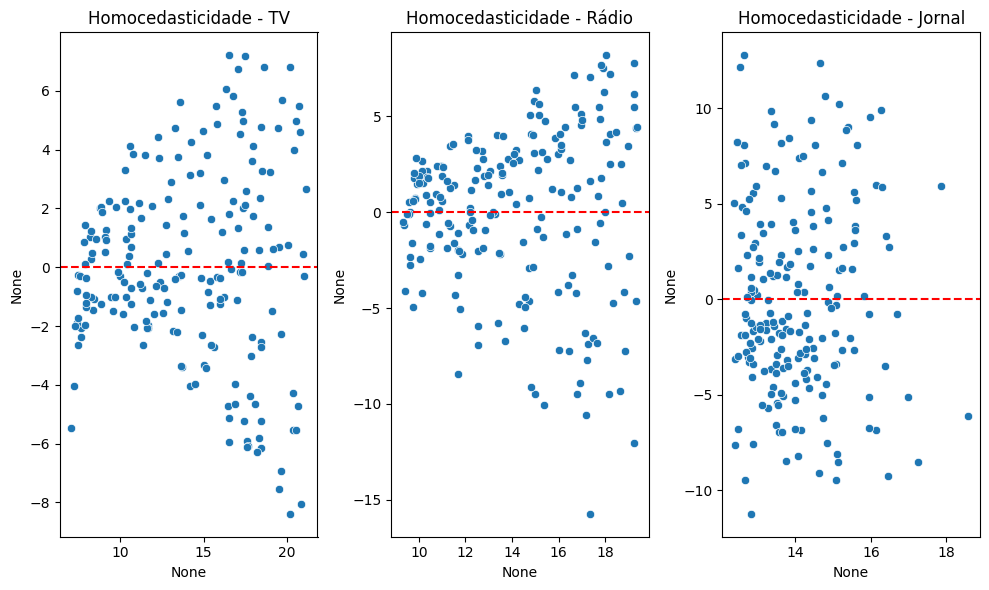

In [52]:
# gráfico de homocedasticidade
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=modelo_tv.fittedvalues, y=residuos_tv)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - TV')

plt.subplot(1, 3, 2)
sns.scatterplot(x=modelo_radio.fittedvalues, y=residuos_radio)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Rádio')

plt.subplot(1, 3, 3)
sns.scatterplot(x=modelo_jornal.fittedvalues, y=residuos_jornal)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Jornal')

plt.tight_layout()
plt.show()

No grafico 3, observa-se que os pontos estão aleatoriamente espalhados em torno da linha zero, com uma faixa constante de dispersão, isso pode inficar *homocedasticidade*. Já nos gráficos 1 e 2, existe um padrão claro e uma ampla dispersão, podendo indicar *heterocedasticidade*.

### Teste de Hipóteses: Homocedasticidade com Breusch-Pagan

In [53]:
# calcula os resíduos do modelo
# cria de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_tv", modelo_tv, dados[['TV']]),
    ("modelo_radio", modelo_radio, dados[['Radio']]),
    ("modelo_jornal", modelo_jornal, dados[['Jornal']])
]

for nome, modelo, dados_coluna in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {format(estatistica)}')
    print(f'p-valor: {p}')
    print(f'f-valor: {fp}')
    print(f'f_p-valor: {f}')

Estatísticas de teste para modelo_tv: 48.037965662293615
p-valor: 4.1804559077556965e-12
f-valor: 1.7618451425695673e-13
f_p-valor: 62.591404771514306
Estatísticas de teste para modelo_radio: 36.6458051740195
p-valor: 1.4166353247318137e-09
f-valor: 2.572140228519948e-10
f_p-valor: 44.41801713255949
Estatísticas de teste para modelo_jornal: 2.471728538393525
p-valor: 0.11591039135561061
f-valor: 0.11707253378080565
f_p-valor: 2.477631414382325


Breusch-Pagan:

Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.

modelo_tv p-valor < 0.05 modelo_radio p-valor < 0.05 modelo_jornal p-valor > 0.05

### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [54]:
for nome, modelo, dados in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {format(estatistica_shapiro)}')
    print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste modelo_tv: 0.9905306561484956
p-valor: 0.2133255143672237
Estatísticas de teste modelo_radio: 0.9607170109899063
p-valor: 2.3665397439607048e-05
Estatísticas de teste modelo_jornal: 0.9819678496757218
p-valor: 0.011395905060619205


Shapiro:

Se p-valor do shapiro é superior a 0.05,isso indica que os resíduos seguem aproximadamente uma distribuição normal.

modelo_tv p-valor > 0.05
modelo_radio p-valor > 0.05
modelo_jornal p-valor < 0.05

### Análise de normalidade QQ-plot

Queremos todos os pontos ou o máximo de pontos possíveis sobre a linha. Isso indica que temos uma variável com distribuição normal.

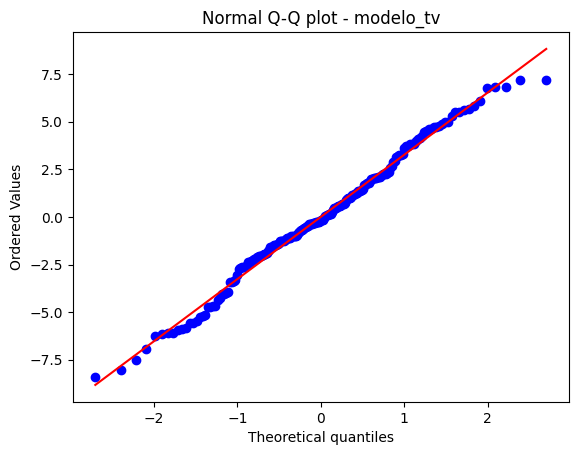

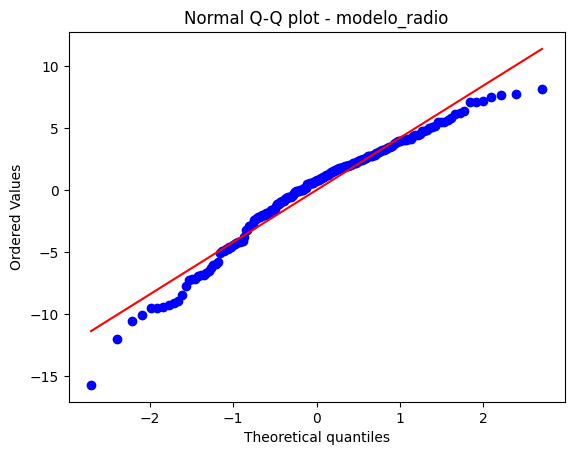

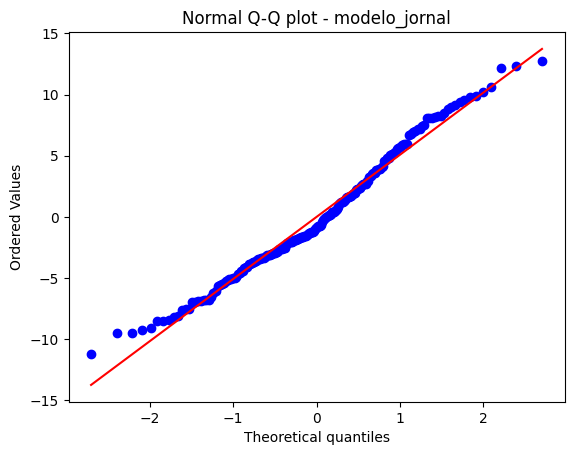

In [55]:
 for nome, modelo, dados in modelos:
    stats.probplot(modelo.resid,dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot - {nome}")
    plt.show()

Aparentemente, "TV" se aproxima mais da reta e parece ser o mais normal.

### Gráficos de resíduos padronizados:

Para verificar se existem outliners (passando do 3 e -3).

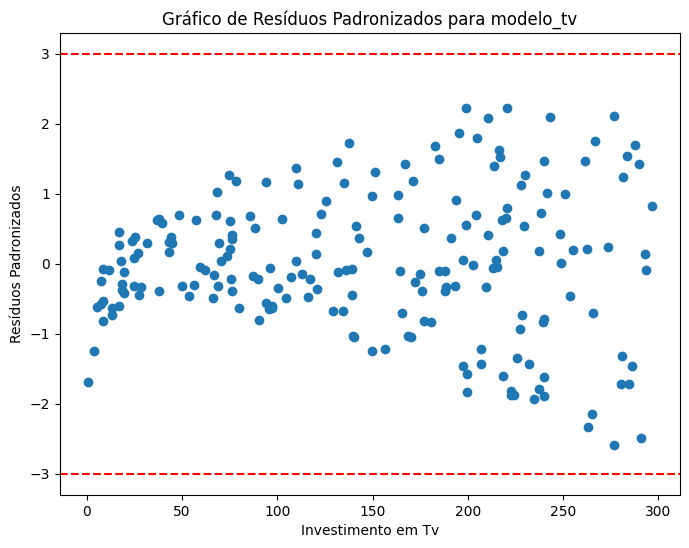

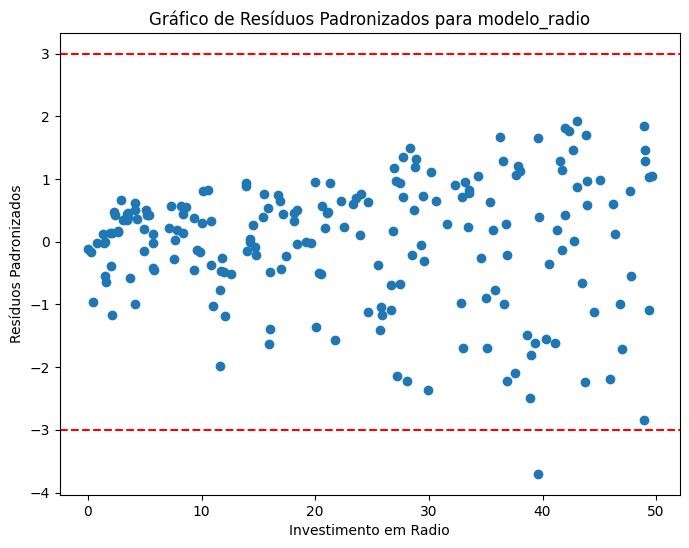

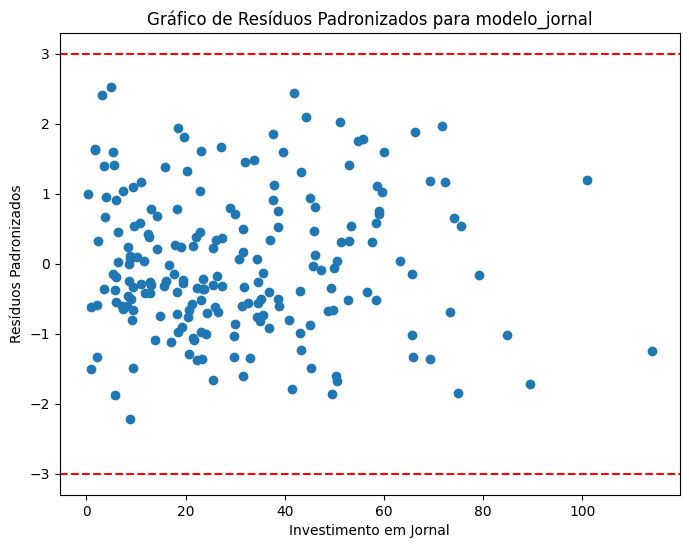

In [58]:
 for nome, modelo, dados in modelos:
    residuos_padronizados = modelo.get_influence().resid_studentized_internal

    plt.figure(figsize=(8, 6))
    plt.scatter(dados, residuos_padronizados)
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Gráfico de Resíduos Padronizados para {nome}')
    plt.xlabel('Investimento em ' + nome.split("_")[1].capitalize())
    plt.ylabel('Resíduos Padronizados')
    plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3.

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| TV      | ❌                                | ✅                          | ✅       | ✅        |
| Rádio   | ❌                                | ❌                          | ✅       | ✅        |
| Jornal  | ✅                                | ❌                          | ✅       | ✅        |

### 5. Análise do Modelo:

In [59]:
for nome, modelo, dados in modelos:
    print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.47e-42
Time:                        20:07:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

| Modelo  | Teste T (Significância dos Coeficientes) | Teste F (Significância Global) | R² Ajustado |
|---------|-----------------------------------------|--------------------------------|-------------|
| TV      | ✅                                        | ✅                              | 0.610       |
| Rádio   | ✅                                        | ✅                              | 0.329       |
| Jornal  | ✅                                        | ✅                              | 0.047       |

- O melhor modelo seria para "TV", pois ele consegue explicar 61% da variabilidade dos nossos dados.


#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos (TV, Rádio e Jornal) apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo de TV tem um R² Ajustado de 0.610, indicando que cerca de 61% da variabilidade em Vendas é explicada pelo modelo. Os modelos de Rádio e Jornal têm R² Ajustado mais baixos, indicando um ajuste menos eficaz.

### Grafico dos modelos ajustados:

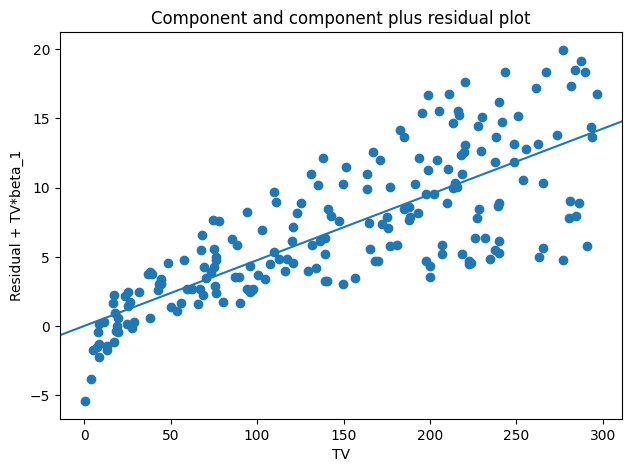

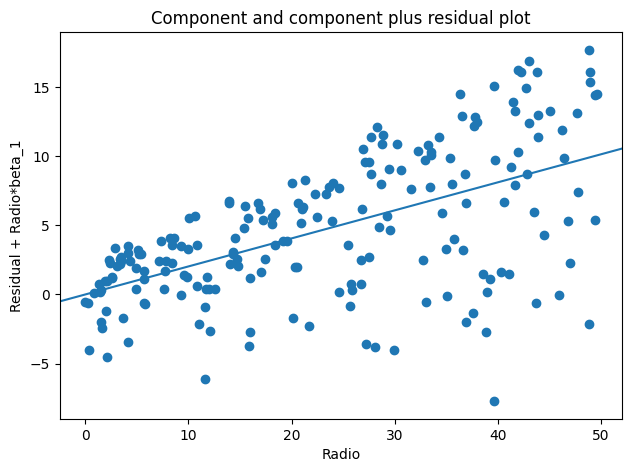

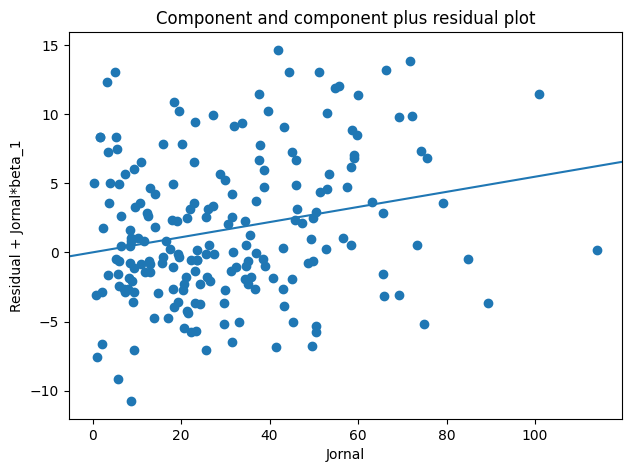

In [60]:
fig = sm.graphics.plot_ccpr(modelo_tv, "TV")
fig.tight_layout(pad=1.0)

fig = sm.graphics.plot_ccpr(modelo_radio, "Radio")
fig.tight_layout(pad=1.0)

fig = sm.graphics.plot_ccpr(modelo_jornal, "Jornal")
fig.tight_layout(pad=1.0)

# REGRESSÃO LINEAR MÚLTIPLA:

Iremos usar um dataset com dados do Exame Nacional do Ensino Médio (ENEM), disponibilizados pelo curso de pós-graduação em 'Ciência de Dados Aplicada à Saúde' da PUC Minas.

#### **Queremos criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

Passo a passo para construir um modelo de Regressão Múltipla:

1 - Definir o Problema

2 - Coletar Dados

3 - Explorar os Dados

4 - Preparar os Dados

5 - Selecionar Variáveis

6 - Construir o Modelo

7 - Avaliar o Modelo

8 - Interpretar os Resultados

In [61]:
import numpy as np
import pandas as pd

In [62]:
enem = pd.read_csv('/content/drive/MyDrive/Data Science/PUC Minas/6. Técnicas de Amostragem e Modelos de Regressão/enem_tratado.csv', sep=',', encoding='iso-8859-1')

### Análise inicial:

In [63]:
enem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [64]:
enem.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO',
       'INTERNET'],
      dtype='object')

In [65]:
enem.shape

(499940, 28)

In [66]:
pd.options.display.float_format = '{:.2f}'.format

Dados estatísticos:

In [67]:
enem.describe()

,IDADE,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO
count,499940.00,499940.00,499940.00,499940.00,176894.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00,499940.00
mean,20.59,1.05,1.03,1.48,35211378.17,1.00,1.00,1.00,1.00,449.92,482.23,491.94,497.59,1.07,125.00,127.07,118.76,124.99,97.20,593.02
std,6.47,0.38,0.23,0.51,443039.20,0.00,0.00,0.00,0.00,152.98,161.12,156.25,183.47,0.58,28.63,39.85,36.78,33.88,57.79,170.54
min,12.00,0.00,0.00,1.00,11003065.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,1.00,1.00,1.00,35016251.00,1.00,1.00,1.00,1.00,412.40,450.60,490.10,427.90,1.00,120.00,120.00,100.00,120.00,60.00,500.00
50%,18.00,1.00,1.00,1.00,35044957.00,1.00,1.00,1.00,1.00,478.10,523.70,538.30,511.80,1.00,120.00,120.00,120.00,120.00,100.00,600.00
75%,21.00,1.00,1.00,2.00,35290701.00,1.00,1.00,1.00,1.00,544.40,578.10,576.20,617.90,1.00,140.00,140.00,140.00,140.00,140.00,680.00
max,91.00,4.00,4.00,4.00,53001036.00,1.00,1.00,1.00,1.00,860.90,822.70,772.30,984.70,9.00,200.00,200.00,200.00,200.00,200.00,1000.00


Selecionando apenas um dos colégios:

In [68]:
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [69]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,49.10,Inglês,1.00,160.00,140.00,140.00,160.00,160.00,760.00,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.00,...,930.50,Inglês,1.00,180.00,200.00,200.00,200.00,140.00,920.00,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,663.90,Inglês,1.00,160.00,140.00,160.00,200.00,120.00,780.00,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,771.90,Inglês,1.00,140.00,180.00,160.00,180.00,140.00,800.00,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,663.10,Inglês,1.00,160.00,200.00,200.00,200.00,200.00,960.00,Sim


In [70]:
colegiox.shape

(130, 28)

Análise estatística:

In [71]:
colegiox.describe()

,IDADE,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,17.25,1.01,1.05,2.00,35132287.00,1.00,1.00,1.00,1.00,566.73,578.82,555.23,667.34,1.00,157.38,172.31,170.46,176.31,171.54,848.00
std,0.50,0.20,0.30,0.00,0.00,0.00,0.00,0.00,0.00,157.60,171.89,162.02,204.13,0.00,15.63,31.93,25.05,25.00,25.98,91.72
min,16.00,0.00,1.00,2.00,35132287.00,1.00,1.00,1.00,1.00,49.00,58.50,54.00,49.10,1.00,100.00,80.00,80.00,120.00,100.00,540.00
25%,17.00,1.00,1.00,2.00,35132287.00,1.00,1.00,1.00,1.00,556.73,583.82,574.90,654.55,1.00,160.00,145.00,160.00,160.00,160.00,800.00
50%,17.00,1.00,1.00,2.00,35132287.00,1.00,1.00,1.00,1.00,601.85,622.30,601.85,721.55,1.00,160.00,180.00,180.00,180.00,180.00,860.00
75%,17.00,1.00,1.00,2.00,35132287.00,1.00,1.00,1.00,1.00,640.00,664.95,625.77,771.83,1.00,160.00,200.00,195.00,200.00,200.00,920.00
max,19.00,3.00,4.00,2.00,35132287.00,1.00,1.00,1.00,1.00,769.30,737.30,705.20,930.50,1.00,200.00,200.00,200.00,200.00,200.00,980.00


Poderíamos dizer que o colegio selecionado é uma amostra representativa de nossa base de dados.

Verificação de valores nulos ou faltantes:

In [72]:
colegiox.isnull().sum()

,0
NU_INSCRICAO,0
NO_MUNICIPIO_RESIDENCIA,0
IDADE,0
SEXO,0
TP_ESTADO_CIVIL,0
RACA,0
TP_NACIONALIDADE,0
TP_ST_CONCLUSAO,0
ESCOLA,0
CO_ESCOLA,0


Verificação dos tipos de dados:

In [74]:
colegiox.dtypes

,0
NU_INSCRICAO,object
NO_MUNICIPIO_RESIDENCIA,object
IDADE,int64
SEXO,object
TP_ESTADO_CIVIL,int64
RACA,object
TP_NACIONALIDADE,int64
TP_ST_CONCLUSAO,int64
ESCOLA,object
CO_ESCOLA,float64


### Regressão múltipla com statsmodel:

In [75]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [76]:
variaveis = colegiox[['NOTA_REDACAO', 'COMP2', 'COMP4', 'COMP5']]

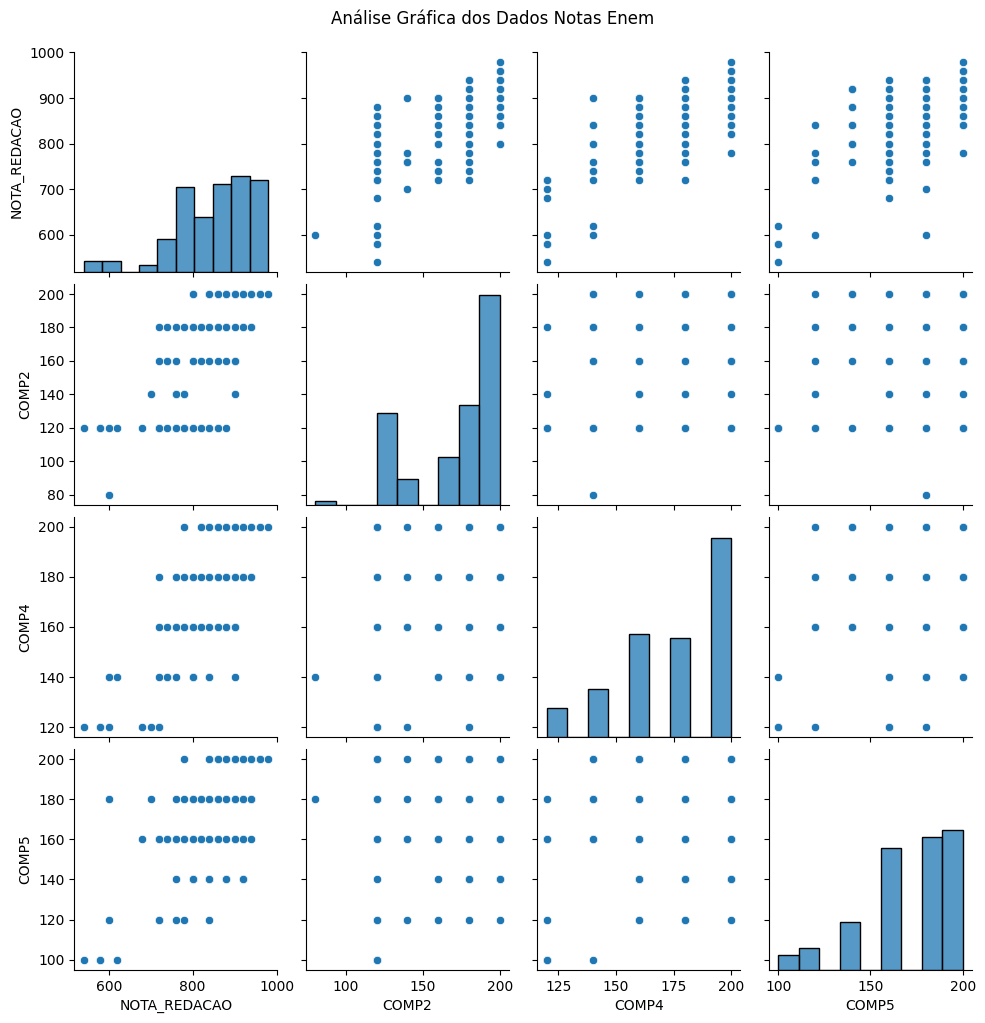

In [77]:
# análise gráfica
import seaborn as sns
sns.pairplot(variaveis)
plt.suptitle("Análise Gráfica dos Dados Notas Enem", y=1.02)
plt.show()

Correlação de variáveis:

In [78]:
variaveis.corr()

,NOTA_REDACAO,COMP2,COMP4,COMP5
NOTA_REDACAO,1.00,0.73,0.79,0.68
COMP2,0.73,1.00,0.38,0.30
COMP4,0.79,0.38,1.00,0.43
COMP5,0.68,0.30,0.43,1.00


Heatmap de correlação:

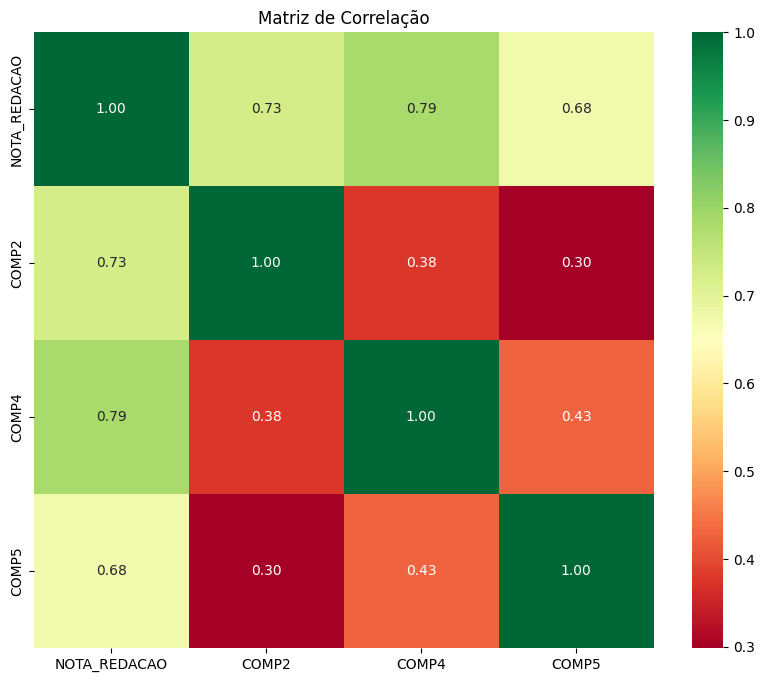

In [79]:
correlation_matrix = variaveis.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## Modelo 1:

In [80]:
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

Verificação de resíduos:

In [81]:
residuos = modelo.resid
residuos

,0
17,-4.50
10760,33.31
13315,-5.72
20006,-26.43
26697,1.35
...,...
426829,35.76
428241,-17.68
443242,-17.50
462446,-56.78


### Teste de normalidade dos resíduos:

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [82]:
import scipy.stats as stats

In [83]:
estatistica, p = stats.shapiro(residuos)

In [84]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847339466949809
p-valor: 0.15435337312320357


Os resíduos possuem distribuição normal.

In [85]:
import matplotlib.pyplot as plt

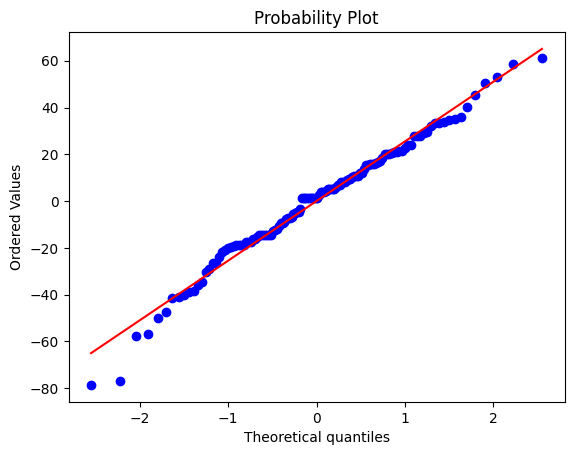

In [86]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

### Análise da Homocedasticidade dos resíduos:

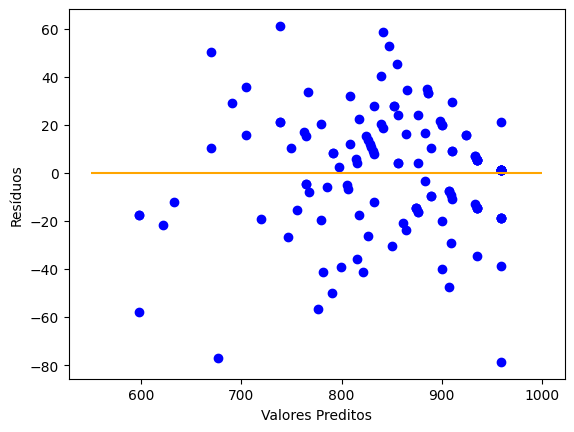

In [90]:
plt.scatter(y=residuos, x=modelo.predict(), color='blue')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Aparentemente os residuos tem uma variação constante.

### Teste Breusch-Pagan (homocedasticidade ou heterocedasticidade):

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [91]:
from statsmodels.compat import lzip

In [92]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

In [93]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 7.939832568694114
p-valor: 0.047271689874476004


Pelo teste, os resíduos não são homocedásticos. E agora?

Verificar outliners:

In [94]:
outliers = modelo.outlier_test()

In [95]:
outliers.max()

,0
student_resid,2.47
unadj_p,0.96
bonf(p),1.00


In [96]:
outliers.min()

,0
student_resid,-3.26
unadj_p,0.00
bonf(p),0.19


Outliners entre -3 e 3.

### Ausência de multicolinearidade:

Somente entre as variáveis independentes.

- Atenção a valores com r > 0,7
- Considerada multicolinearidade quando r > 0.9.

In [97]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [99]:
correlacoes = variaveis.corr()
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.00,0.38,0.30
COMP4,0.38,1.00,0.43
COMP5,0.30,0.43,1.00


### Fator de Inflação de Variância (VIF):

(esse valor deve ser menor que 5)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [101]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

,0
const,72.47
COMP2,1.20
COMP4,1.34
COMP5,1.26


### Análise do Modelo:

Análise do modelo

- Intercept e Coeficiente

- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

- Adjusted R-squared (explicação do modelo através dos dados).

- p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [102]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           3.97e-70
Time:                        20:27:48   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

**Equação**: Nota Redação = 116,1987 + 1,2831.COMP2 + 1,7298.COMP4 + 1,1993.COMP5

In [103]:
# criando uma coluna de previsão
colegiox['previsao'] = modelo.fittedvalues

<ipython-input-103-a060d688c885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo.fittedvalues


In [104]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,Inglês,1.00,160.00,140.00,140.00,160.00,160.00,760.00,Sim,764.50
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.00,...,Inglês,1.00,180.00,200.00,200.00,200.00,140.00,920.00,Sim,886.69
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,Inglês,1.00,160.00,140.00,160.00,200.00,120.00,780.00,Sim,785.72
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,Inglês,1.00,140.00,180.00,160.00,180.00,140.00,800.00,Sim,826.43
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,Inglês,1.00,160.00,200.00,200.00,200.00,200.00,960.00,Sim,958.65


## Modelo 2:

Reduzir mais um componente e verificar o quanto ainda iremos explicar dos valores finais da nota de redação.

In [106]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [107]:
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegiox).fit()

In [108]:
residuos2 = modelo2.resid
residuos2

,0
17,-5.80
10760,-19.73
13315,-73.38
20006,-67.15
26697,20.27
...,...
426829,46.77
428241,-69.44
443242,-52.14
462446,-118.37


### Teste de normalidade dos resíduos:

In [111]:
import scipy.stats as stats
import matplotlib.pyplot as plt

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [110]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847788839398657
p-valor: 0.15593487454121718


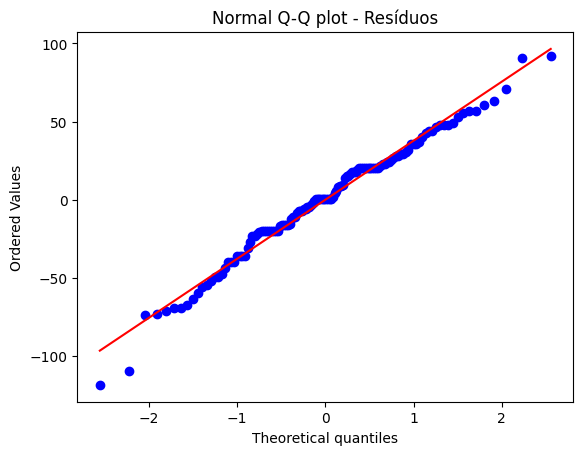

In [112]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da homocedasticidade dos resíduos:

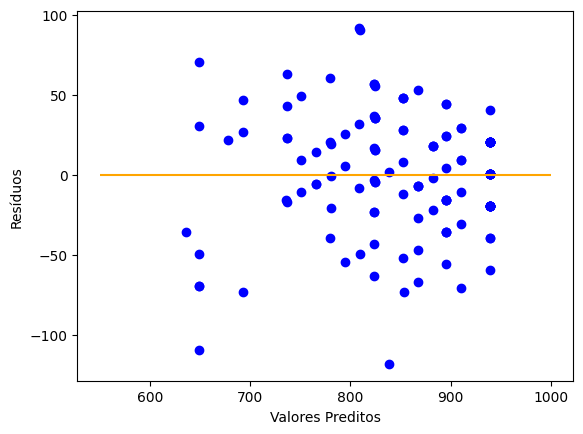

In [113]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='blue')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

### Teste Breusch-Pagan (homocedasticidade ou heterocedasticidade):

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [114]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [115]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 15.042745745701497
p-valor: 0.0005413887974310043
f-valor: 8.309300366021285
f_p-valor: 0.00040612282224010204


In [116]:
outliers = modelo2.outlier_test()

In [117]:
outliers.max()

,0
student_resid,2.52
unadj_p,0.99
bonf(p),1.00


In [118]:
outliers.min()

,0
student_resid,-3.25
unadj_p,0.00
bonf(p),0.19


Outiliers nos resíduos: entre -3 e 3.

### Ausência de multicolinearidade:

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [119]:
variaveis2 = colegiox[['COMP2','COMP4']]

In [120]:
variaveis2.head()

,COMP2,COMP4
17,140.00,160.00
10760,200.00,200.00
13315,140.00,200.00
20006,180.00,180.00
26697,200.00,200.00


In [121]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

,COMP2,COMP4
COMP2,1.00,0.38
COMP4,0.38,1.00


###  Fator de Inflação de Variância (VIF):

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [123]:
vif = add_constant(variaveis2) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

,0
const,59.97
COMP2,1.16
COMP4,1.16


### Análise do modelo:

Análise do modelo

- Intercept

- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

- Adjusted R-squared (explicação do modelo através dos dados).

- p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [124]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     314.2
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           6.76e-50
Time:                        20:33:13   Log-Likelihood:                -655.51
No. Observations:                 130   AIC:                             1317.
Df Residuals:                     127   BIC:                             1326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0062     25.745      8.313      0.0

**Equação**: Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [125]:
# criando uma coluna com previsão
colegiox['previsao2'] = modelo2.fittedvalues

<ipython-input-125-ee210845dcd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao2'] = modelo2.fittedvalues


In [126]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao,previsao2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,1.00,160.00,140.00,140.00,160.00,160.00,760.00,Sim,764.50,765.80
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.00,...,1.00,180.00,200.00,200.00,200.00,140.00,920.00,Sim,886.69,939.73
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,1.00,160.00,140.00,160.00,200.00,120.00,780.00,Sim,785.72,853.38
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.00,...,1.00,140.00,180.00,160.00,180.00,140.00,800.00,Sim,826.43,867.15
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.00,...,1.00,160.00,200.00,200.00,200.00,200.00,960.00,Sim,958.65,939.73
